# Traing ResNet 152 Classifer with Cross Vaildation 1/10

## Data Set
Testing Patients : 
* Bleeding : 15, 37, 38, 39, 60, 72, 77, 78
* Non-Bleeding : 28, 29


In [1]:
from fastai.vision import *

In [2]:
path = Path("/Users/mingrenshen/Projects/MedicalImgAnalysis/data/DataSet6/fasterAI")

In [3]:
tfms = get_transforms(do_flip=True,
                      flip_vert=True,
                      max_lighting=0.1,
                      max_warp=0)

In [ ]:
def moveImgToFolder(pID,classID,folder):
    

In [ ]:
# Move images according to Named Patients ID
bleedingList = [15, 37, 38, 39, 60, 72, 77, 78]
nonbleedList = [28, 29]



In [5]:
# data = ImageDataBunch.from_folder(path, test='test', ds_tfms=get_transforms(), size=224)
data = ImageDataBunch.from_folder(path, 
                                  valid_pct=0.2,
                                  ds_tfms= tfms,
                                  test='test', 
                                  size=224)

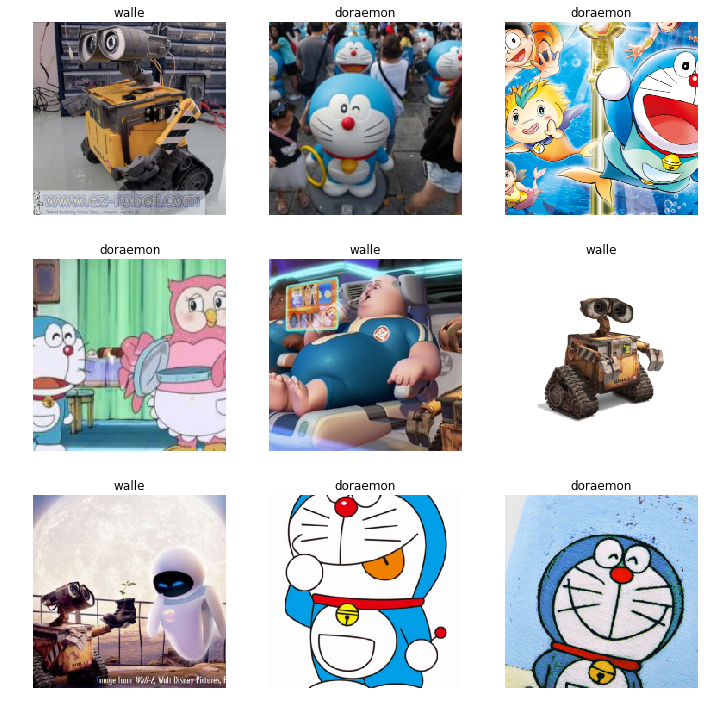

In [6]:
data.show_batch(rows=3, figsize=(10,10))

In [7]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/mingrenshen/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:05<00:00, 8732797.27it/s] 


In [8]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.555958,0.088597,0.969697,00:43


In [9]:
interp = ClassificationInterpretation.from_learner(learn)

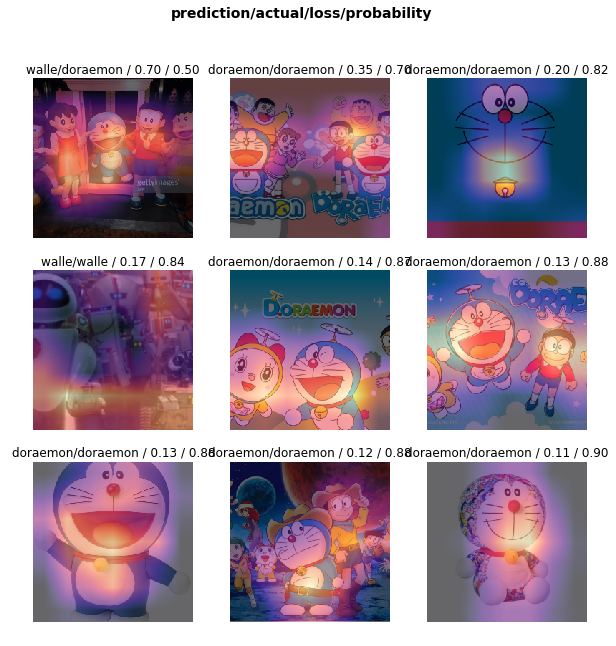

In [10]:
interp.plot_top_losses(9, figsize=(10,10))

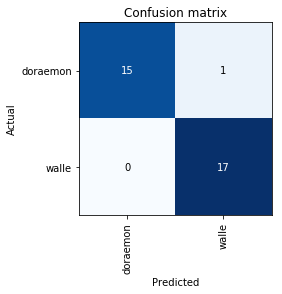

In [11]:
interp.plot_confusion_matrix()

In [12]:
img = learn.data.test_ds[0][0]


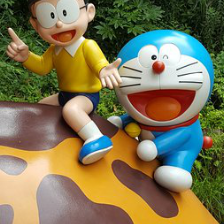

In [13]:
img

In [14]:
learn.predict(img)

(Category doraemon, tensor(0), tensor([0.6844, 0.3156]))